## RESEARCH QUESTION 2

To what extent past class failures might have an impact on alcohol consumption in students?

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt
from sklearn.model_selection import GridSearchCV

from sklearn import set_config
set_config(transform_output = "pandas")

In [2]:
#conda install --channel=conda-forge scikit-learn

## Function to Save Figures

In [3]:
from pathlib import Path
IMAGES_PATH = Path() / "images/question 2"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
# Import train and test sets
X_train = pd.read_csv('smoteTrainSet.csv')
X_test = pd.read_csv('ScaledTestSet.csv')


In [5]:
X_train.columns


Index(['sex_F', 'sex_M', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'guardian_father',
       'guardian_mother', 'guardian_other', 'schoolsup_no', 'schoolsup_yes',
       'famsup_no', 'famsup_yes', 'paid_no', 'paid_yes', 'activities_no',
       'activities_yes', 'higher_no', 'higher_yes', 'romantic_no',
       'romantic_yes', 'age', 'Medu', 'Fedu', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'health', 'absences', 'avg_grade',
       'alc'],
      dtype='object')

## baseline classifier 0 R

In [6]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = X_train.drop(columns = 'alc')
y = X_train['alc']

In [7]:
xt = X_test.drop('avg_grade',axis=1)

In [8]:
dummy.fit(X,y)

DummyClassifier(strategy='most_frequent')

### 0r classifier accuray

In [9]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(X_train['alc'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(X_test['alc'], 
                                      dummy.predict(xt)))

Train Accuracy 0.5
Test Accuracy 0.6076555023923444


In [10]:
# Separate target from dataset
y_train = X_train['alc']
X_train = X_train[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]
y_test = X_test['alc']
X_test = X_test[['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no', 'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade']]



In [11]:
y_train

0      1.0
1      1.0
2      0.0
3      1.0
4      1.0
      ... 
887    1.0
888    1.0
889    1.0
890    1.0
891    1.0
Name: alc, Length: 892, dtype: float64

In [12]:
X_train.columns


Index(['schoolsup_no', 'schoolsup_yes', 'paid_no', 'paid_yes', 'higher_no',
       'higher_yes', 'studytime', 'failures', 'absences', 'avg_grade'],
      dtype='object')

## Finding suitable value of k for KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

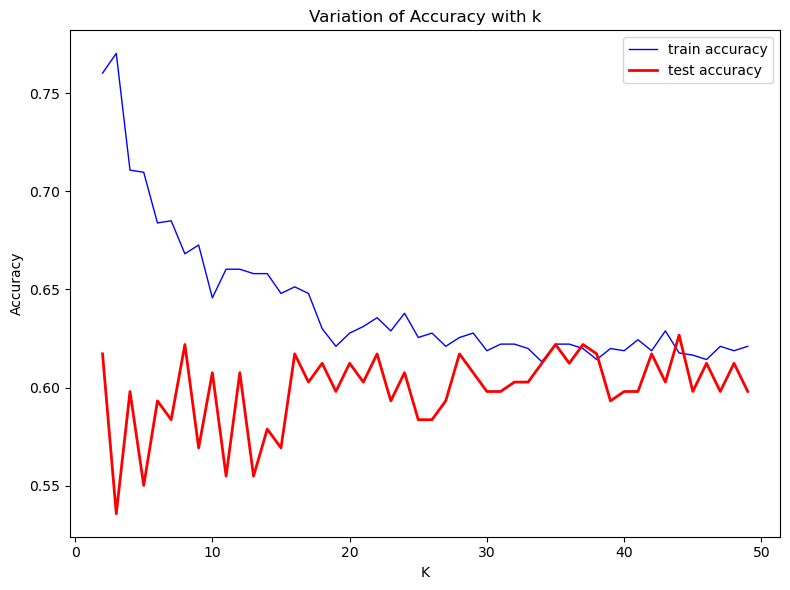

In [14]:
k = range(2, 50)
train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against k')
plt.show();

In [15]:
pd.DataFrame({'K': neighbors, 'Train Acc': train_acc, 'Test Acc': test_acc})

K  Train Acc  Test Acc
0    2   0.760090  0.617225
1    3   0.770179  0.535885
2    4   0.710762  0.598086
3    5   0.709641  0.550239
4    6   0.683857  0.593301
5    7   0.684978  0.583732
6    8   0.668161  0.622010
7    9   0.672646  0.569378
8   10   0.645740  0.607656
9   11   0.660314  0.555024
10  12   0.660314  0.607656
11  13   0.658072  0.555024
12  14   0.658072  0.578947
13  15   0.647982  0.569378
14  16   0.651345  0.617225
15  17   0.647982  0.602871
16  18   0.630045  0.612440
17  19   0.621076  0.598086
18  20   0.627803  0.612440
19  21   0.631166  0.602871
20  22   0.635650  0.617225
21  23   0.628924  0.593301
22  24   0.637892  0.607656
23  25   0.625561  0.583732
24  26   0.627803  0.583732
25  27   0.621076  0.593301
26  28   0.625561  0.617225
27  29   0.627803  0.607656
28  30   0.618834  0.598086
29  31   0.622197  0.598086
30  32   0.622197  0.602871
31  33   0.619955  0.602871
32  34   0.613229  0.612440
33  35   0.622197  0.622010
34  36   0.622197  0.612440
35  37   0.619955  0.622010
36  38   0.614350  0.617225
37  39   0.619955  0.593301
38  40   0.618834  0.598086
39  41   0.624439  0.598086
40  42   0.618834  0.617225
41  43   0.628924  0.602871
42  44   0.617713  0.626794
43  45   0.616592  0.598086
44  46   0.614350  0.612440
45  47   0.621076  0.598086
46  48   0.618834  0.612440
47  49   0.621076  0.598086

## Applying suitable value of k in KNN Classifier

[[91 36]
 [43 39]]
Accuracy Score 0.6220095693779905
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.72      0.70       127
         1.0       0.52      0.48      0.50        82

    accuracy                           0.62       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.62      0.62       209



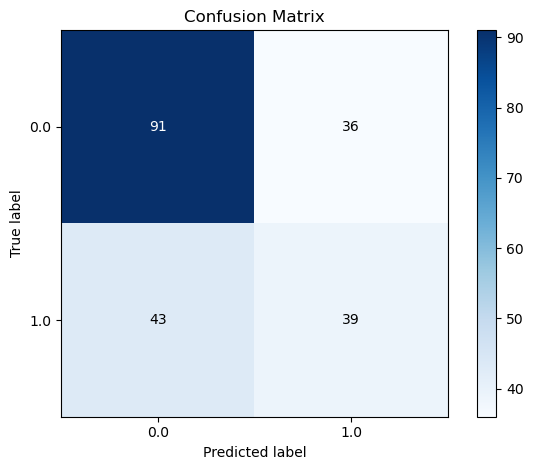

In [16]:
best_grid_knn= KNeighborsClassifier(n_neighbors=8)
best_grid_knn.fit(X_train, y_train)
y_pred=best_grid_knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for KNN hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

In [17]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

0   1
0  91  36
1  43  39

In [18]:
# !pip install scikit-plot


import scikitplot as skplt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print('Test Accuracy ', accuracy_score(y_test, y_pred ))

Test Accuracy  0.6220095693779905


## Hyperparameter Tuning on Decision Tree

In [19]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [20]:
param_grid = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5, 10, 15, 30],
}

In [21]:
dt_grid = DecisionTreeClassifier()
grid_search_dt = GridSearchCV(estimator=dt_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_dt.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [22]:
best_grid_dt = grid_search_dt.best_estimator_
best_grid_dt

DecisionTreeClassifier(criterion='entropy', max_depth=5, splitter='random')

## Appying best estimators on Decision Tree

[[85 42]
 [43 39]]
Accuracy Score 0.5933014354066986
Classification report: 
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.67       127
         1.0       0.48      0.48      0.48        82

    accuracy                           0.59       209
   macro avg       0.57      0.57      0.57       209
weighted avg       0.59      0.59      0.59       209



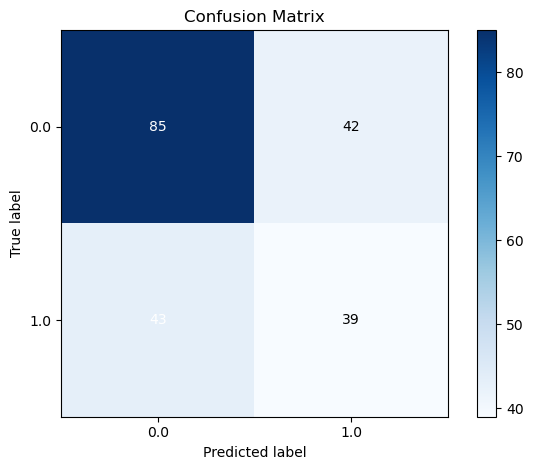

In [23]:
best_grid_dt.fit(X_train, y_train)
y_pred=best_grid_dt.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred, cmap='Blues');
save_fig('Confusion Matrix for Descision_Tree hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

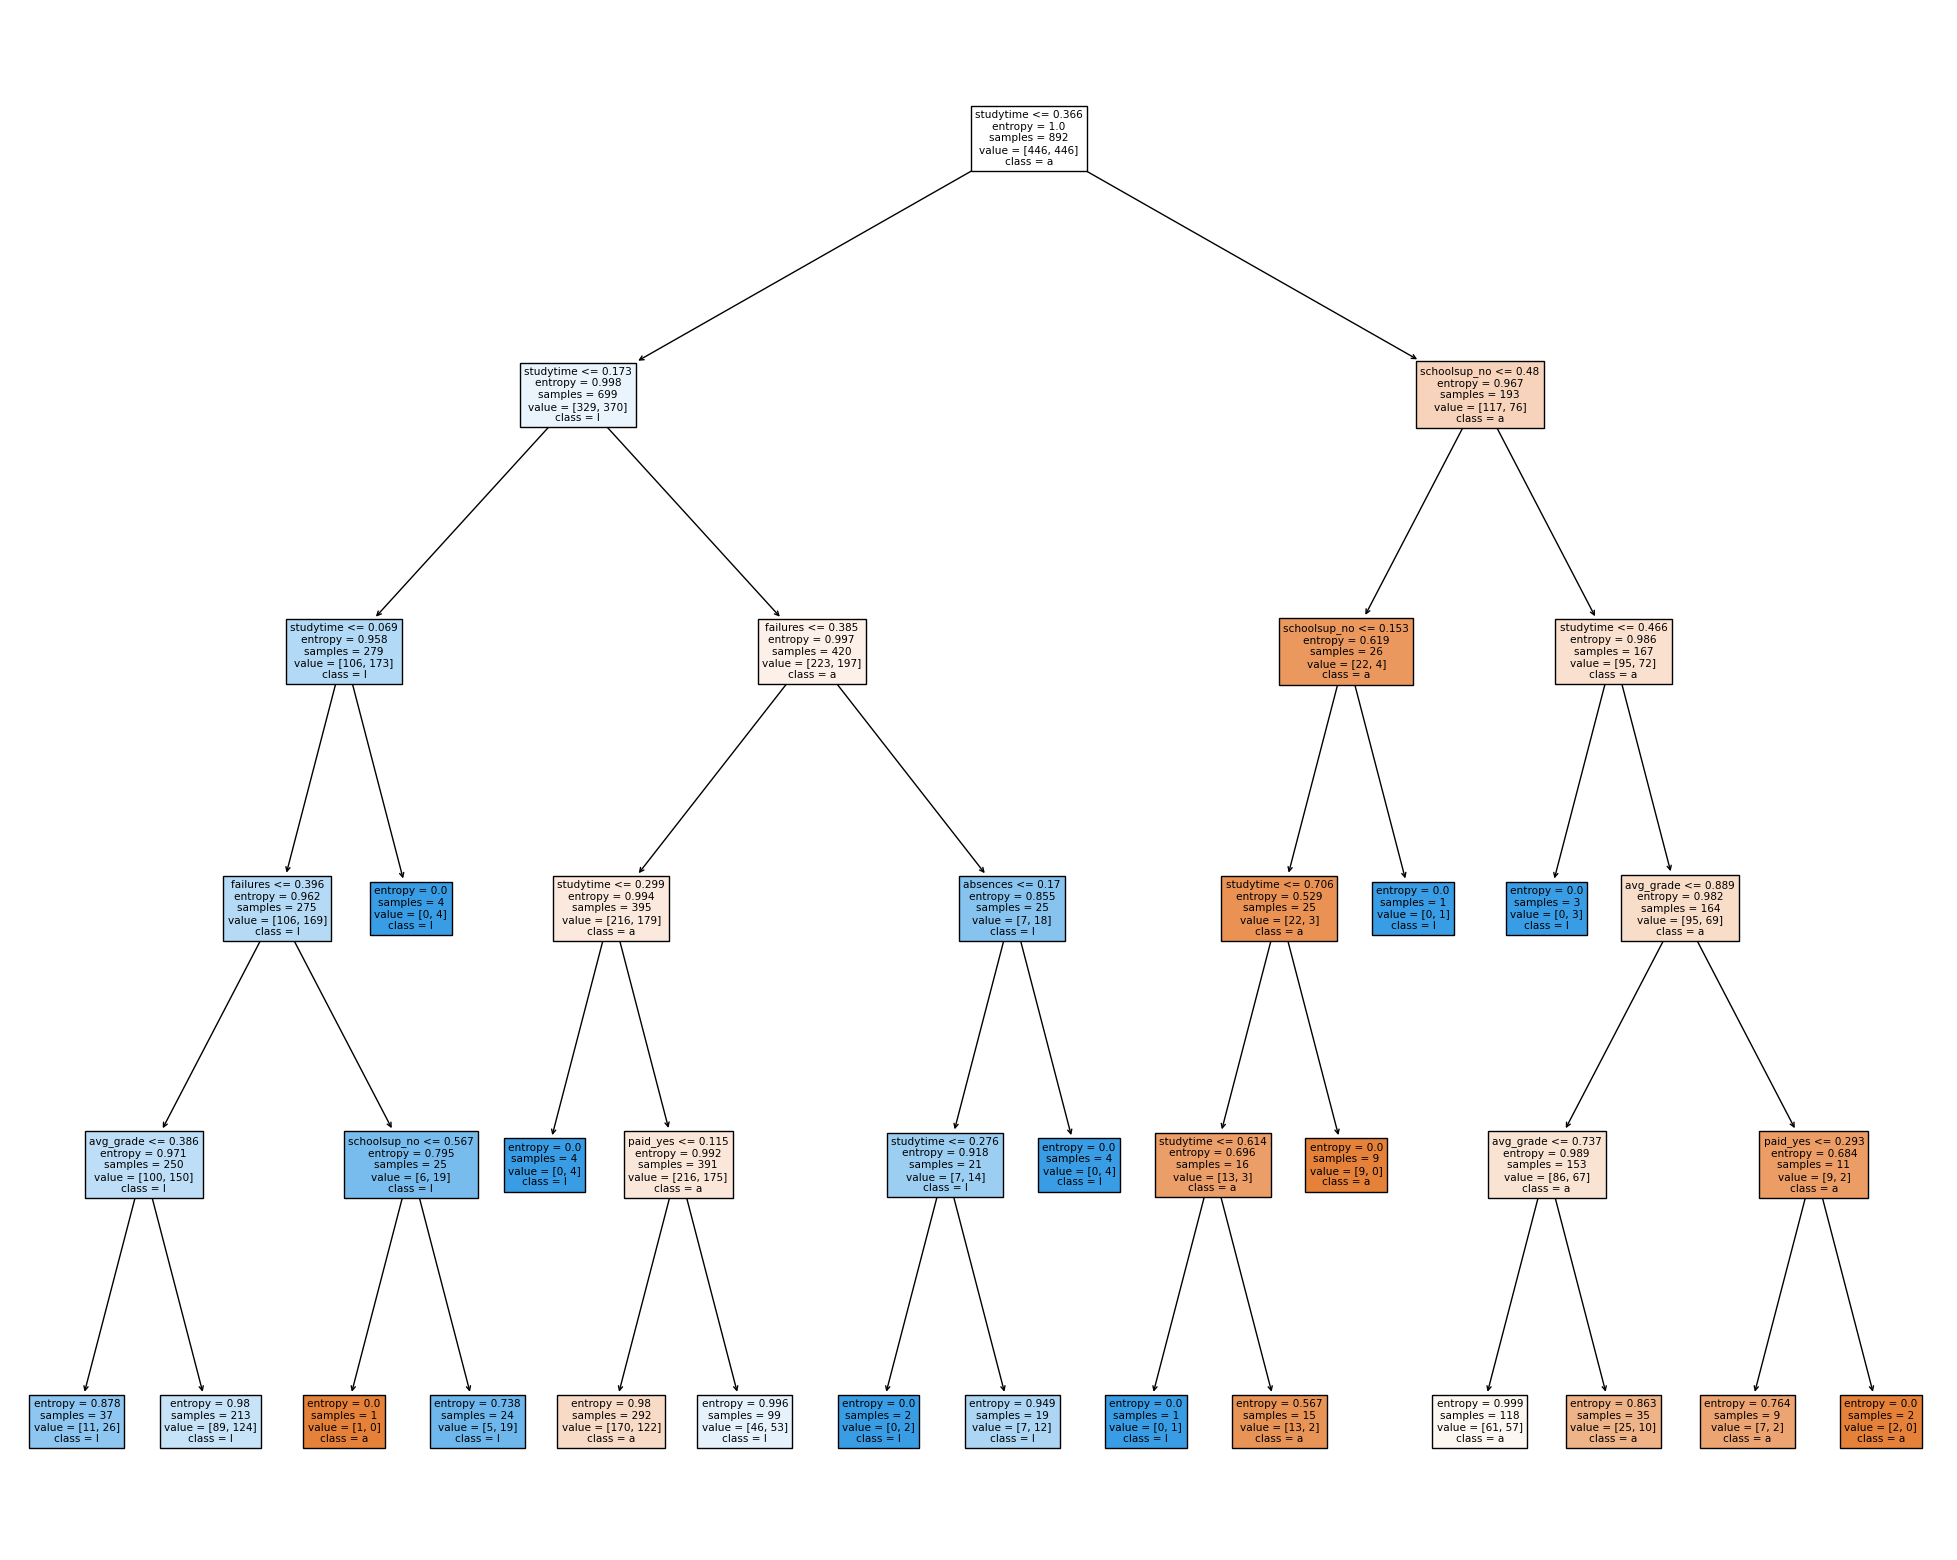

In [24]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_grid_dt, 
                   feature_names=X_train.columns.values.tolist(),  
                   class_names=y_train.name,
                   filled=True)

In [25]:
fig.savefig("decision_tree.png")

Max Depth =  1 , Train Acc. =  0.584 , Test Acc. =  0.608
Max Depth =  2 , Train Acc. =  0.6 , Test Acc. =  0.598
Max Depth =  3 , Train Acc. =  0.626 , Test Acc. =  0.603
Max Depth =  4 , Train Acc. =  0.632 , Test Acc. =  0.612
Max Depth =  5 , Train Acc. =  0.654 , Test Acc. =  0.612
Max Depth =  6 , Train Acc. =  0.683 , Test Acc. =  0.622
Max Depth =  7 , Train Acc. =  0.706 , Test Acc. =  0.612
Max Depth =  8 , Train Acc. =  0.726 , Test Acc. =  0.603
Max Depth =  9 , Train Acc. =  0.75 , Test Acc. =  0.574
Max Depth =  10 , Train Acc. =  0.768 , Test Acc. =  0.603
Max Depth =  11 , Train Acc. =  0.793 , Test Acc. =  0.598
Max Depth =  12 , Train Acc. =  0.815 , Test Acc. =  0.574
Max Depth =  13 , Train Acc. =  0.833 , Test Acc. =  0.589
Max Depth =  14 , Train Acc. =  0.848 , Test Acc. =  0.593
Max Depth =  15 , Train Acc. =  0.859 , Test Acc. =  0.608
Max Depth =  16 , Train Acc. =  0.863 , Test Acc. =  0.589
Max Depth =  17 , Train Acc. =  0.877 , Test Acc. =  0.579
Max Depth

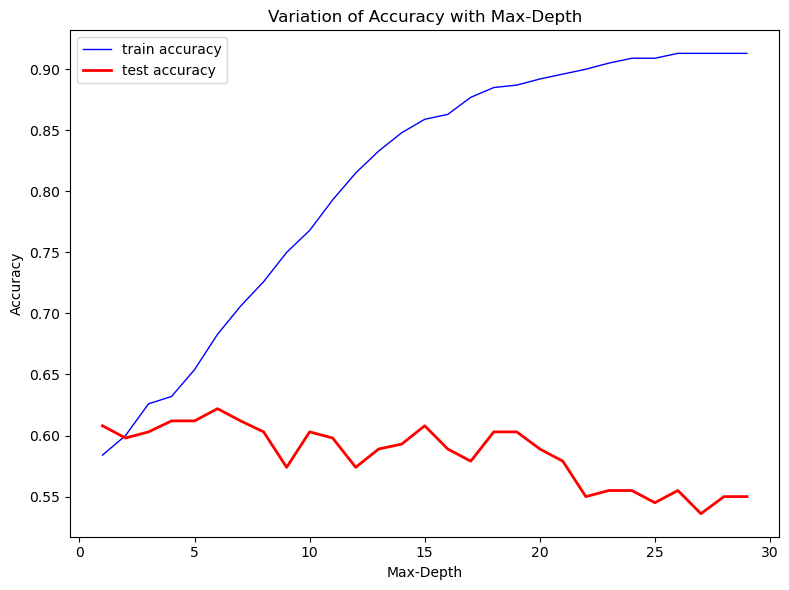

In [26]:
train_acc = []
test_acc = []
max_depth =[]

for depth in range(1, 30):
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_train, y_train)
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)).round(3))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)).round(3))
    max_depth.append(depth)

for i in range(1, 30):
    print('Max Depth = ', i, ', Train Acc. = ', train_acc[i-1], ', Test Acc. = ' ,
         test_acc[i-1])

plt.figure(figsize = (8,6))
plt.xlabel('Max-Depth')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with Max-Depth')
plt.plot(max_depth, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(max_depth, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
save_fig('Accuracy against max_depth')
plt.show();

In [27]:
# Confusion matrix for train set
print("Confusion Matrix for Train Set")
pd. DataFrame (confusion_matrix(y_train, best_grid_dt.predict(X_train)))

Confusion Matrix for Train Set


0    1
0  288  158
1  193  253

In [28]:
# Confusion matrix for test set
print("Confusion Matrix for Test Set")
pd. DataFrame (confusion_matrix(y_test, best_grid_dt.predict(X_test)))


Confusion Matrix for Test Set


0   1
0  85  42
1  43  39

In [91]:
print("Classification Report for Train Set")
print(classification_report (y_train, best_grid_dt.predict(X_train).round (3)))
print("Accuracy Score {}".format(accuracy_score(y_train,best_grid_dt.predict(X_train))))

Classification Report for Train Set
              precision    recall  f1-score   support

         0.0       0.61      0.69      0.64       446
         1.0       0.64      0.55      0.59       446

    accuracy                           0.62       892
   macro avg       0.62      0.62      0.62       892
weighted avg       0.62      0.62      0.62       892

Accuracy Score 0.6199551569506726


In [89]:
print("Classification Report for Test Set")
print(classification_report(y_test, best_grid_dt.predict (X_test). round(3)))
print("Accuracy Score {}".format(accuracy_score(y_test,best_grid_dt.predict(X_test))))

Classification Report for Test Set
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.70       127
         1.0       0.54      0.55      0.54        82

    accuracy                           0.64       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.64      0.64       209

Accuracy Score 0.6363636363636364


## Hyperparameter Tuning on Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
param_grid= {
    'n_estimators': [10, 50, 100, 500],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 30, 100],
    'max_features': [None, 'sqrt', 'log2']
}

In [33]:
rf_grid = RandomForestClassifier()
grid_search_rf = GridSearchCV(estimator=rf_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 30, 100],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=2)

In [34]:
# Finding out the best estimator
best_grid_rf = grid_search_rf.best_estimator_
best_grid_rf

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=50)

In [35]:
best_grid_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       n_estimators=50)

In [36]:
y_pred = best_grid_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

[[81 46]
 [32 50]]
Accuracy Score 0.6267942583732058
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.64      0.67       127
         1.0       0.52      0.61      0.56        82

    accuracy                           0.63       209
   macro avg       0.62      0.62      0.62       209
weighted avg       0.64      0.63      0.63       209



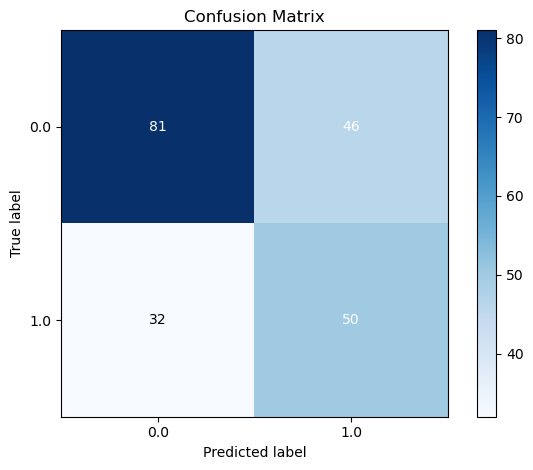

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Random forest hyper-para tuned q2')

## Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

[[72 55]
 [40 42]]
0.5454545454545454
              precision    recall  f1-score   support

         0.0       0.64      0.57      0.60       127
         1.0       0.43      0.51      0.47        82

    accuracy                           0.55       209
   macro avg       0.54      0.54      0.54       209
weighted avg       0.56      0.55      0.55       209



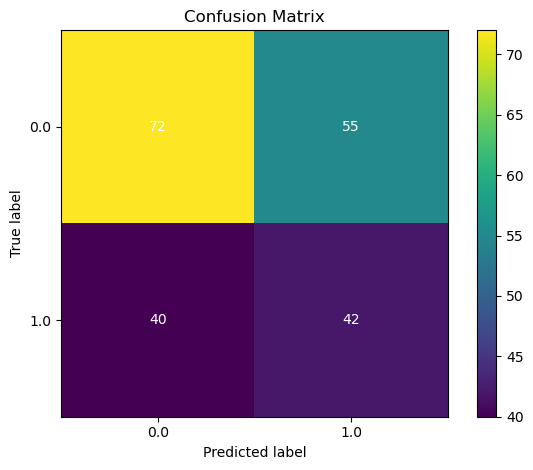

In [39]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
skplt.metrics.plot_confusion_matrix(y_test, prediction, cmap="viridis");
save_fig('Confusion Matrix for Random forest q2')
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

## Hyperparameter Tuning on Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet', None],
    'random_state' : ['42', None],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

In [42]:
lr_grid = LogisticRegression()
grid_search_lr = GridSearchCV(estimator=lr_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_lr.fit(X_train,y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15,

[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=30, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=30, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=5, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=5, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=5, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=5, splitter=random; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=15, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=15, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=15, splitter=best; total time=   0.0s
[CV] END .....criterion=entr

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.53883e-17): result may not be accurate.
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are rem

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'random_state': ['42', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             verbose=2)

In [43]:
# Finding out the best estimator
best_grid_lr = grid_search_lr.best_estimator_
best_grid_lr

LogisticRegression(penalty=None)

[[74 53]
 [29 53]]
Accuracy Score 0.6076555023923444
Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       127
         1.0       0.50      0.65      0.56        82

    accuracy                           0.61       209
   macro avg       0.61      0.61      0.60       209
weighted avg       0.63      0.61      0.61       209



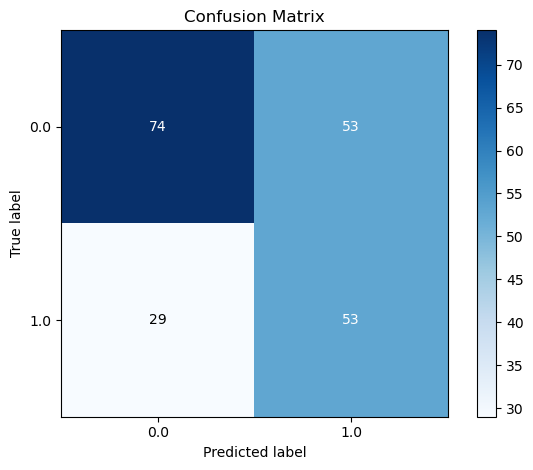

In [44]:
# Applying the best grid for logistic regression
best_grid_lr.fit(X_train, y_train)
y_pred=best_grid_lr.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for Logistic Regression hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on SVM

In [45]:
from sklearn.svm import SVC

In [46]:
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'random_state' : [42, None],
    'gamma' : ['scale', 'auto'],
    'shrinking' : [True, False],
    'probability' : [True, False],
    'decision_function_shape' : ['ovo', 'ovr'],
    'break_ties' : [True, False]
}

In [47]:
svc_grid = SVC()
grid_search_svc = GridSearchCV(estimator=svc_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_svc.fit(X_train,y_train)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=entropy, max_depth=10, splitter=best; total time=   0.0s
[CV] END .....criterion=entr

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END ......criterion=gin

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=5, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=10, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=10, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=15, splitter=best; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END ......criterion=gini, max_depth=15, splitter=random; total time=   0.0s
[CV] END ........criterion=gini, max_depth=30, splitter=best; total time=   0.0s
[CV] END ........criterion=gini, max_depth=30, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END .........criterion=gini, max_depth=5, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ....criterion=log_loss, max_depth=15, splitter=best; total time=   0.0s
[CV] END ..criterion=log_loss, max_depth=30, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=None, n_estimators=10; total time=   0.0

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

ValueError: break_ties must be False when decision_function_shape is 'ovo'

  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predi

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterio

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py", line 809, in predict
    raise ValueError(
ValueError: break_ties must be False when decision_function_shape is

[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=30, max_features=log2, n_estimators=500; total time=   1.7s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=10; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=100, max_features=None, n_estimators=500; total time=   2.0s
[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] EN

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.4s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   2.3s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=500; total time=   1.6s
[CV] END cri

[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=500; total time=   1.6s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=500; total time=   1.7s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.

[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV] END criterion=log_loss, max_depth=10, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=log_loss, max_depth=10, max_features=log2, n_estimators=500; total time=   1.4s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=50; total time=   0.2s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.4s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_depth=30, max_features=None, n_estimators=500; total time=   2.2s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=30, max_features=sqrt, n_estimators=10; total time=   0.0s
[CV] END crit

[CV] END criterion=entropy, max_depth=100, max_features=None, n_estimators=500; total time=   1.6s
[CV] END criterion=entropy, max_depth=100, max_features=sqrt, n_estimators=500; total time=   1.3s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=entropy, max_depth=100, max_features=log2, n_estimators=500; total time=   1.6s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=50; total time=   0.4s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.5s
[CV] END criterion=log_loss, max_depth=None, max_features=None, n_estimators=100; total time=   0.4s
[C

[CV] END criterion=log_loss, max_depth=100, max_features=sqrt, n_estimators=500; total time=   1.4s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=10; total time=   0.0s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=50; total time=   0.1s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=100; total time=   0.3s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=100; total time=   0.2s
[CV] END criterion=log_loss, max_depth=100, max_features=log2, n_estimators=500; total time=   1.3s
[CV] END ....penalty=l1, random_state=None, solver=newton-cg; total time=   0.0s
[CV] END ....penalty=l1,

[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=scale, kernel=poly, p

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=Tru

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probabil

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probabil

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kern

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probabili

[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovo, gamma=auto, kernel=

[CV] END break_ties=True, decision_function_shape=ovr, gamma=scale, kernel=sigmoid, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=linear, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=line

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, pro

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kerne

[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=rbf, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel=sigmoid, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=True, decision_function_shape=ovr, gamma=auto, kernel

/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.61207241 0.61207241
 0.61207241 0.61207241 0.61207241 0.61207241 0.61207241 0.61207241
 0.60084894 0.60084894 0.60084894 

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'break_ties': [True, False],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'probability': [True, False],
                         'random_state': [42, None],
                         'shrinking': [True, False]},
             verbose=2)

In [48]:
best_grid_svc = grid_search_svc.best_estimator_
best_grid_svc

SVC(break_ties=True, kernel='linear', probability=True, random_state=42)

[[70 57]
 [31 51]]
Accuracy Score 0.5789473684210527
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.55      0.61       127
         1.0       0.47      0.62      0.54        82

    accuracy                           0.58       209
   macro avg       0.58      0.59      0.58       209
weighted avg       0.61      0.58      0.58       209



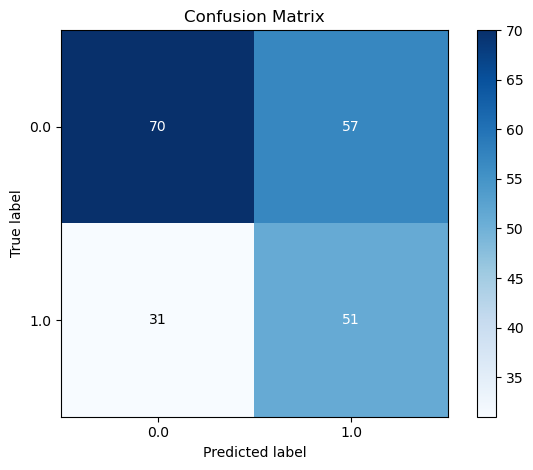

In [49]:
# Applying the best grid for SVC
best_grid_svc.fit(X_train, y_train)
y_pred=best_grid_svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for SVC hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))

## Hyperparameter Tuning on Multinomial Naive Bayes

In [50]:
from  sklearn.naive_bayes import MultinomialNB

In [51]:
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
    'fit_prior': [True, False]
}

In [52]:
nb_grid = MultinomialNB()
grid_search_nb = GridSearchCV(estimator=nb_grid,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search_nb.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=True, random_state=None, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=True; total time=   0.0s
[CV] E

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
                         'fit_prior': [True, False]},
             verbose=2)

In [53]:
best_grid_nb = grid_search_nb.best_estimator_
best_grid_nb

MultinomialNB()

[[88 39]
 [41 41]]
Accuracy Score 0.6172248803827751
Classification report: 
              precision    recall  f1-score   support

         0.0       0.68      0.69      0.69       127
         1.0       0.51      0.50      0.51        82

    accuracy                           0.62       209
   macro avg       0.60      0.60      0.60       209
weighted avg       0.62      0.62      0.62       209



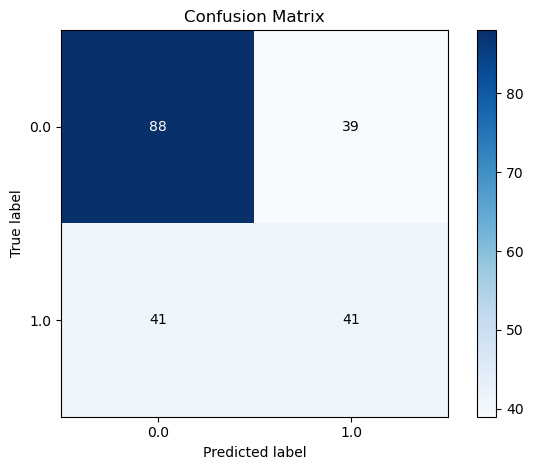

In [54]:
# Applying the best grid for Multinomial Naive Bayes
best_grid_nb.fit(X_train, y_train)
y_pred=best_grid_nb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
save_fig('Confusion Matrix for MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: \n{}".format(classification_report(y_test,y_pred)))


[[312 134]
 [221 225]]
Accuracy Score 0.602017937219731
Classification report: 
              precision    recall  f1-score   support

         0.0       0.59      0.70      0.64       446
         1.0       0.63      0.50      0.56       446

    accuracy                           0.60       892
   macro avg       0.61      0.60      0.60       892
weighted avg       0.61      0.60      0.60       892



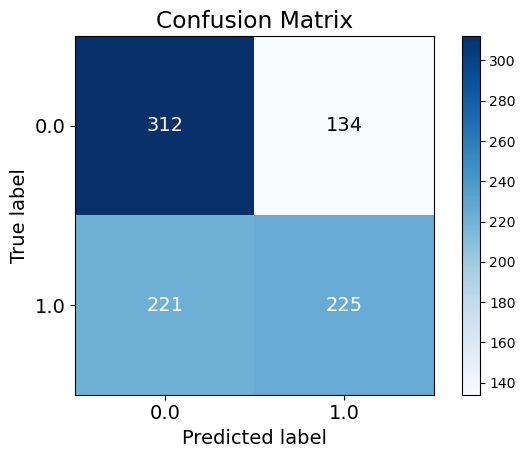

In [92]:
print(confusion_matrix(y_train,best_grid_nb.predict(X_train)))
skplt.metrics.plot_confusion_matrix(y_train, best_grid_nb.predict(X_train));
save_fig('Confusion Matrix for train set of MultinomialNB hyper-para tuned q2')
print("Accuracy Score {}".format(accuracy_score(y_train, best_grid_nb.predict(X_train))))
print("Classification report: \n{}".format(classification_report(y_train, best_grid_nb.predict(X_train))))

## ensemble learning

In [55]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## Hard voting classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

hard_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'hard'
)
hard_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     splitter='random')),
                             ('lr', LogisticRegression(penalty=None)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, kernel='linear',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())])

In [57]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, hard_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6220095693779905
DecisionTreeClassifier 0.5885167464114832
LogisticRegression 0.6076555023923444
RandomForestClassifier 0.6076555023923444
SVC 0.5789473684210527
MultinomialNB 0.6172248803827751
VotingClassifier 0.6363636363636364


Accuracy Score 0.6363636363636364
Classification report: 
              precision    recall  f1-score   support

         0.0       0.71      0.67      0.69       127
         1.0       0.53      0.59      0.56        82

    accuracy                           0.64       209
   macro avg       0.62      0.63      0.62       209
weighted avg       0.64      0.64      0.64       209



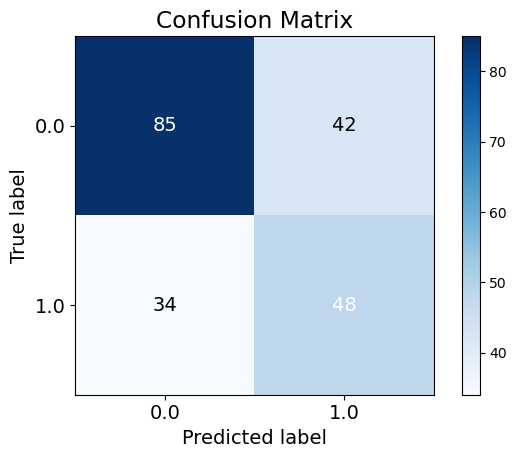

In [58]:
skplt.metrics.plot_confusion_matrix(y_test, hard_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Hard Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, hard_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, hard_voting_clf.predict(X_test))))

## Soft voting classifier

In [59]:
soft_voting_clf = VotingClassifier(
    estimators=[
        ('knn', best_grid_knn),
        ('dt', best_grid_dt),
        ('lr', best_grid_lr),
        ('rf', best_grid_rf),
        ('svc', best_grid_svc),
        ('nb', best_grid_nb)
    ], 
    voting = 'soft'
)
soft_voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     splitter='random')),
                             ('lr', LogisticRegression(penalty=None)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     max_features='log2',
                                                     n_estimators=50)),
                             ('svc',
                              SVC(break_ties=True, kernel='linear',
                                  probability=True, random_state=42)),
                             ('nb', MultinomialNB())],
                 voting='soft')

In [60]:
from sklearn.metrics import accuracy_score
for clf in [best_grid_knn, best_grid_dt, best_grid_lr, best_grid_rf, best_grid_svc, best_grid_nb, soft_voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.6220095693779905
DecisionTreeClassifier 0.6363636363636364
LogisticRegression 0.6076555023923444
RandomForestClassifier 0.6028708133971292
SVC 0.5789473684210527
MultinomialNB 0.6172248803827751
VotingClassifier 0.6363636363636364


Accuracy Score 0.6363636363636364
Classification report: 
              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       127
         1.0       0.53      0.63      0.58        82

    accuracy                           0.64       209
   macro avg       0.63      0.64      0.63       209
weighted avg       0.65      0.64      0.64       209



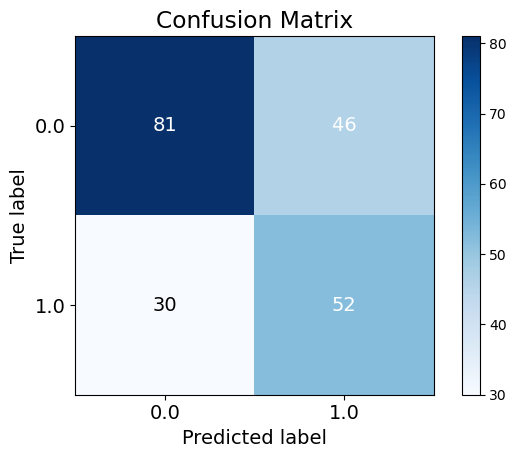

In [61]:
skplt.metrics.plot_confusion_matrix(y_test, soft_voting_clf.predict(X_test));
save_fig('Confusion Matrix for Ensemble Soft Voting q2')
print("Accuracy Score {}".format(accuracy_score(y_test, soft_voting_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, soft_voting_clf.predict(X_test))))

## bagging and pasting

In [62]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            max_samples=100, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

## out of bag evaluation

In [63]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,
                            oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
print('OOB Score', bag_clf.oob_score_)

y_pred = bag_clf.predict(X_test)
print('Test Accuracy', accuracy_score(y_test, y_pred))

OOB Score 0.5392376681614349
Test Accuracy 0.5502392344497608


Accuracy Score 0.5502392344497608
Classification report: 
              precision    recall  f1-score   support

         0.0       0.67      0.52      0.58       127
         1.0       0.45      0.60      0.51        82

    accuracy                           0.55       209
   macro avg       0.56      0.56      0.55       209
weighted avg       0.58      0.55      0.56       209



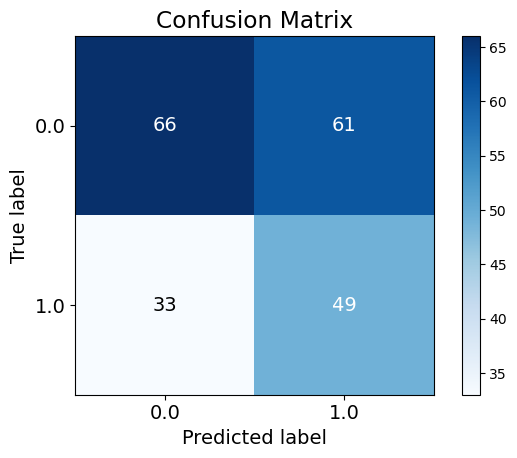

In [64]:
skplt.metrics.plot_confusion_matrix(y_test, bag_clf.predict(X_test));
save_fig('Confusion Matrix for Out of bag q2')
print("Accuracy Score {}".format(accuracy_score(y_test, bag_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, bag_clf.predict(X_test))))

## impact of no. of estimators

In [65]:
import numpy as np
est = range(50, 500, 50)
train_acc = []
test_acc = []
oob_acc = []
estim = []
out = []
for num_est in est:
    estim.append(num_est)
    rnd_clf = RandomForestClassifier(n_estimators=num_est, oob_score = True, 
                                     max_leaf_nodes=16, n_jobs=-1, 
                                     random_state=42)
    rnd_clf.fit(X_train, y_train)
    y_pred_rf = rnd_clf.predict(X_test)
    train_acc.append(
        accuracy_score(y_train, rnd_clf.predict(X_train)))
    test_acc.append(
        accuracy_score(y_test, rnd_clf.predict(X_test)))
    oob_acc.append(rnd_clf.oob_score_)
i = 0
while i < len(estim):
    print('Num of estimators: ', estim[i], ' train acc = ', train_acc[i],
         ' test acc = ', test_acc[i], 'oob = ', oob_acc[i])
    i = i + 1

Num of estimators:  50  train acc =  0.67152466367713  test acc =  0.6124401913875598 oob =  0.6098654708520179
Num of estimators:  100  train acc =  0.6737668161434978  test acc =  0.6172248803827751 oob =  0.6132286995515696
Num of estimators:  150  train acc =  0.6760089686098655  test acc =  0.6172248803827751 oob =  0.6221973094170403
Num of estimators:  200  train acc =  0.6771300448430493  test acc =  0.6124401913875598 oob =  0.6143497757847534
Num of estimators:  250  train acc =  0.679372197309417  test acc =  0.6076555023923444 oob =  0.6177130044843049
Num of estimators:  300  train acc =  0.6760089686098655  test acc =  0.6124401913875598 oob =  0.6154708520179372
Num of estimators:  350  train acc =  0.6782511210762332  test acc =  0.6076555023923444 oob =  0.6177130044843049
Num of estimators:  400  train acc =  0.6782511210762332  test acc =  0.6124401913875598 oob =  0.6165919282511211
Num of estimators:  450  train acc =  0.679372197309417  test acc =  0.6124401913875

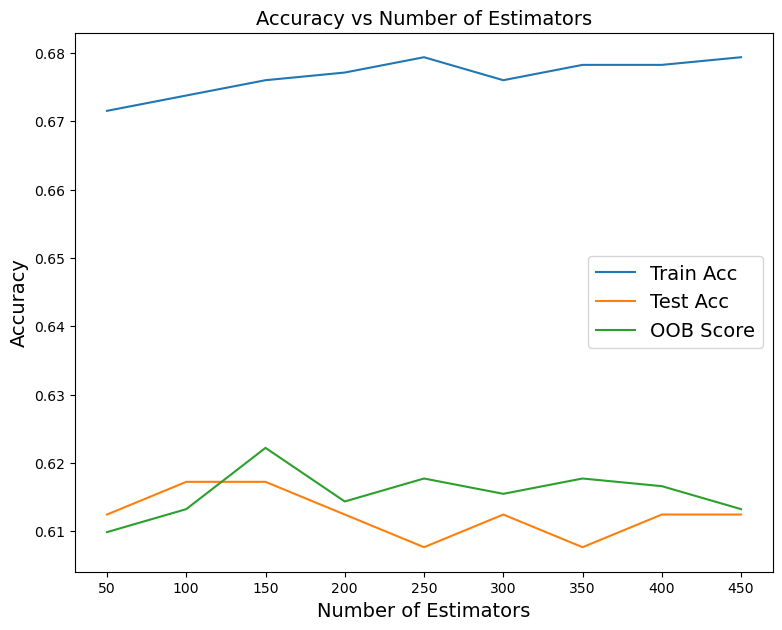

In [66]:
plt.figure(figsize = (9,7))
plt.plot(estim, train_acc, label = 'Train Acc')
plt.plot(estim, test_acc, label = 'Test Acc')
plt.plot(estim, oob_acc, label = 'OOB Score')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## ADA boost classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=100,
    learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.5933014354066986

Accuracy Score 0.5933014354066986
Classification report: 
              precision    recall  f1-score   support

         0.0       0.69      0.59      0.64       127
         1.0       0.49      0.60      0.54        82

    accuracy                           0.59       209
   macro avg       0.59      0.59      0.59       209
weighted avg       0.61      0.59      0.60       209



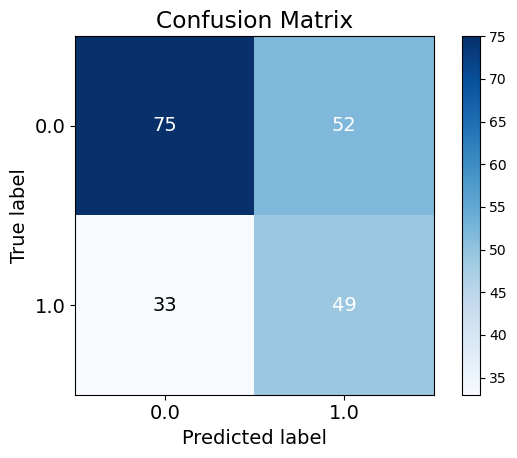

In [68]:
skplt.metrics.plot_confusion_matrix(y_test, ada_clf.predict(X_test));
save_fig('Confusion Matrix for AdaBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, ada_clf.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, ada_clf.predict(X_test))))

In [69]:
import numpy as np
est = np.linspace(1, 500, 2)
train_acc = []
test_acc = []
num_learners = []
for estimators in est:
    ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=int(estimators),
    learning_rate=0.5, random_state=42)
    ada_clf.fit(X_train, y_train)
    y_pred_test = ada_clf.predict(X_test)
    y_pred_train = ada_clf.predict(X_train)
    train_acc.append(accuracy_score(y_train, y_pred_train))
    test_acc.append(accuracy_score(y_test, y_pred_test))
    num_learners.append(estimators)

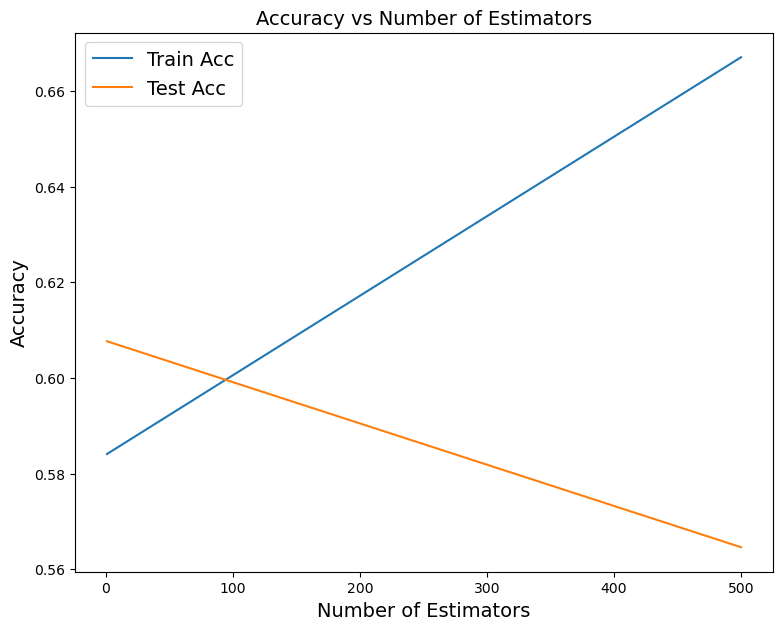

In [70]:
plt.figure(figsize = (9,7))
plt.plot(num_learners, train_acc, label = 'Train Acc')
plt.plot(num_learners, test_acc, label = 'Test Acc')
plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators')
plt.show()

## XGBoost

#conda install -c conda-forge xgboost

In [71]:
import xgboost as xgb
print (xgb)

<module 'xgboost' from '/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/xgboost/__init__.py'>


In [72]:
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.5023923444976076

Accuracy Score 0.5023923444976076
Classification report: 
              precision    recall  f1-score   support

         0.0       0.61      0.52      0.56       127
         1.0       0.39      0.48      0.43        82

    accuracy                           0.50       209
   macro avg       0.50      0.50      0.49       209
weighted avg       0.52      0.50      0.51       209



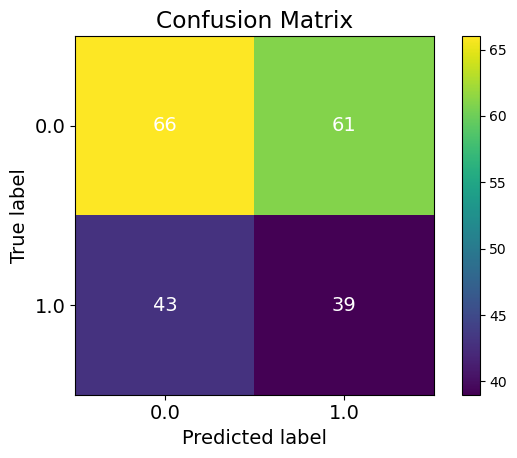

In [73]:
skplt.metrics.plot_confusion_matrix(y_test, xgb_cl.predict(X_test), cmap='viridis');
save_fig('Confusion Matrix for XGBoost q2')
print("Accuracy Score {}".format(accuracy_score(y_test, xgb_cl.predict(X_test))))
print("Classification report: \n{}".format(classification_report(y_test, xgb_cl.predict(X_test))))

## XAI using LIME

In [74]:
conda install -c conda-forge ds-lime

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [75]:
from lime.lime_tabular import LimeTabularExplainer

In [76]:
feature_names = X_train.columns
#X_train.columns.values.tolist()

In [77]:
# Create a LimeTabularExplainer object
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=['low', 'high'])


In [78]:
# Select a specific instance from the testing set for explanation
instance_idx = 0
instance = X_test.values[instance_idx]
true_label = y_test[instance_idx]

In [79]:
# Generate explanations using LIME
#Since our accuracy is the highest for Multinomial Naive Bayes, we will be using Multinomial Naive Bayes to interpret 
explanation_lime = explainer.explain_instance(instance, best_grid_dt.predict_proba, num_features=len(feature_names))


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [80]:
# Print the true label and predicted probabilities
print("True Label:", true_label)
print("Predicted Probabilities:", best_grid_nb.predict_proba([instance]))



True Label: 1.0
Predicted Probabilities: [[0.49133204 0.50866796]]


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [81]:
# Print the top features and their weights in the LIME explanation
print("LIME Explanation:")
for feature, weight in explanation_lime.as_list():
    print(feature, weight)

LIME Explanation:
paid_yes > 0.00 0.34820052086293274
higher_no <= 0.00 -0.10250473454380186
studytime > 0.33 -0.05755767796909301
failures <= 0.00 -0.0387065113256407
0.44 < avg_grade <= 0.56 0.013281306015790719
schoolsup_yes <= 0.00 0.001195839863837317
0.04 < absences <= 0.11 -0.0001360597557394081
higher_yes <= 1.00 0.0
paid_no <= 1.00 0.0
schoolsup_no <= 1.00 0.0


### Feature Importance Plot

In [82]:
feature_importance = explanation_lime.as_list()

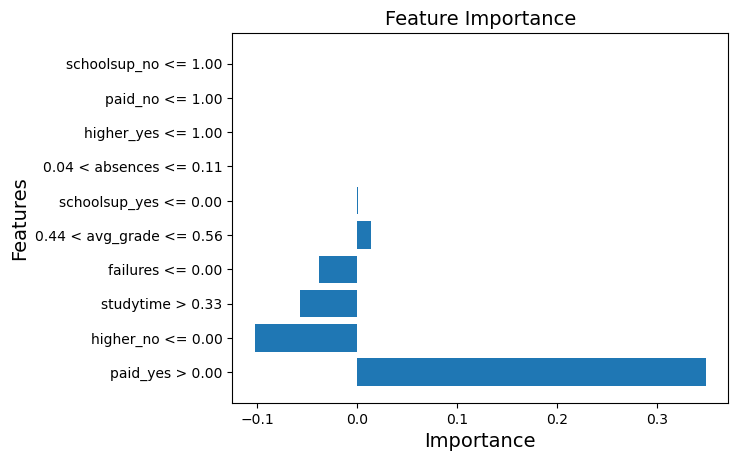

In [83]:
features, values = zip(*feature_importance)
plt.barh(features, values)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('images/question 2/LIME Feature Importance q2.png')
plt.show()


### LIME Explanation Plot

In [84]:
feature_contributions = explanation_lime.local_exp[1]

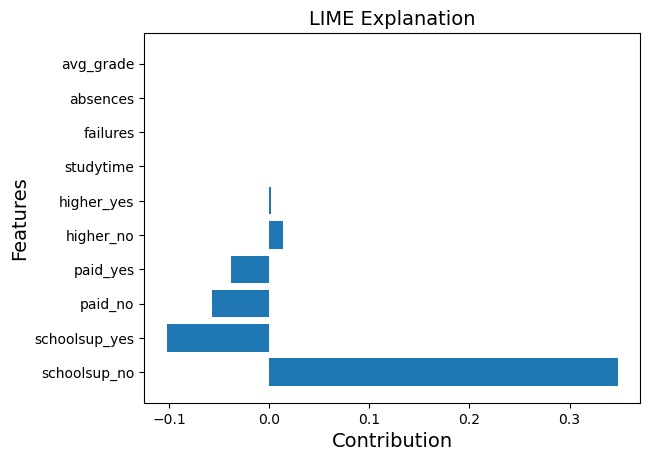

In [85]:
features, contributions = zip(*feature_contributions)
plt.barh(feature_names, contributions)
plt.xlabel('Contribution')
plt.ylabel('Features')
plt.title('LIME Explanation')
plt.savefig('images/question 2/LIME Explanation Graph q2.png')
plt.show()

## Explanation for class 1

In [86]:
#Perform the explanation on the 0th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[0], best_grid_nb.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_nb.predict(X_test)[0])
print('Actual: ', y_test[0])
explaination.show_in_notebook(show_table = True, show_all = False)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 1 q2.html')

Predicted:  1.0
Actual:  1.0


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.15878e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Explanation for class 0

In [87]:
#Perform the explanation on the 8th instance in the test data
explaination = explainer.explain_instance(X_test.iloc[8], best_grid_nb.predict_proba)

# show the result of the model's explaination
print('Predicted: ', best_grid_nb.predict(X_test)[8])
print('Actual: ', y_test[8])
explaination.show_in_notebook(show_table = True, show_all = False,)
explaination.save_to_file('images/question 2/LIME Prediction Probability for class 0 q2.html')

Predicted:  0.0
Actual:  0.0


/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
/Users/mdnavedmeraz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.93246e-43): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf,

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=42, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=True; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=poly, probability=True, random_state=42, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovr, gamma

[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=True, random_state=None, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=auto, kernel=sigmoid, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=linear, probability=True, random_state=42, shrinking=True; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovr, gamma

[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=True, random_state=None, shrinking=True; total time=   0.4s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, probability=False, random_state=42, shrinking=True; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovr, gamma=scale, kernel=rbf, proba

[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=True, random_state=None, shrinking=False; total time=   0.2s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.0s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=poly, probability=False, random_state=None, shrinking=False; total time=   0.1s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kernel=rbf, probability=True, random_state=42, shrinking=False; total time=   0.3s
[CV] END break_ties=False, decision_function_shape=ovo, gamma=scale, kerne